In [28]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
%cd '/content/drive/My Drive/RL/amalearn'

/content/drive/My Drive/RL/amalearn


In [30]:
!pwd

/content/drive/My Drive/RL/amalearn


In [31]:
!pip install -e .

Obtaining file:///content/drive/My%20Drive/RL/amalearn
  Attempting uninstall: amalearn
    Found existing installation: amalearn 0.1
    Can't uninstall 'amalearn'. No files were found to uninstall.
  Running setup.py develop for amalearn


In [32]:
!ls

amalearn	   Q1.ipynb  Q3.ipynb	    setup.py
amalearn.egg-info  Q2.ipynb  README.md	    Untitled0.ipynb
example		   Q3.csv    salighe.ipynb


##Q3

In [33]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import exp

In [34]:
data = pd.read_csv('Q3.csv')
# data.head()
type(data.columns[0])
# data.columns[0]

data = np.array(data)
data

array([[ 8.3080752,  0.118582 , 71.868439 , ..., 19.966871 , 60.7034562,
        22.545958 ],
       [ 9.040232 ,  1.276014 , 71.5519086, ..., 19.766006 , 59.838882 ,
        22.771789 ],
       [ 8.405164 ,  2.573752 , 72.2216056, ..., 20.104219 , 58.5127394,
        22.247714 ],
       ...,
       [ 8.3328848,  1.179804 , 71.3302872, ..., 19.974936 , 60.7230212,
        23.331864 ],
       [ 8.2552506,  2.139315 , 72.1724598, ..., 20.814999 , 59.293283 ,
        23.146193 ],
       [ 8.1621658,  0.734454 , 71.4763358, ..., 20.478108 , 60.5554324,
        24.175131 ]])

In [35]:
def softmax(vector):
	e = vector - min(vector)
	return e / e.sum()

In [36]:
# import numpy as np
# a = np.zeros(8)
# a = [[3,3,3,3,3,3],[1,2,5,3,3,3],[1,2,3,3,2,3],[1,2,3,3,3,1],[1,2,3,6,3,3],[1,2,4,3,3,3],[1,2,3,3,3,9],[1,2,3,4,4,3]]
# for i in range(8):
#   print(np.mean(a[i]))

In [87]:
def reinforcement_comparison(alpha, beta):

  H = np.zeros(6)
  reference_reward = 0
  count = np.zeros(6)
  values = np.zeros(6)
  chosen_actions = []
  REGRET = []
  plt.figure()
  for i in range(data.shape[0]):
    reward = np.zeros(6)
    # p = np.zeros(6)
    for j in range(int(data.shape[1]/2)):
      reward[j] = 2* float(data[i][j*2]) - float(data[i][j*2+1])
      H[j] += beta*(reward[j] - reference_reward)
      
    pi = softmax(H) 
    
    action = np.random.choice(6,1,p=pi)
    # print("action",action)
    # print("count",count)
    
    reference_reward +=  alpha*(reward[action] - reference_reward)
    count[action] +=1
    values[action] = reward[action]*(1/count[action]) + ((count[action]-1)/count[action])*values[action]
    # chosen_actions.append(action)
  
    optimal_action = np.argmax(values)
    # print("optimal_action",optimal_action)
    
    regret = 0
    for k in range(6):
      regret += ((values[optimal_action] - values[k]) * count[k])
      # print(regret)
    REGRET.append(regret)
  print(len(REGRET))   
  plt.plot(REGRET)
  plt.xlabel("trial")
  plt.ylabel("regret")
  plt.show()

498


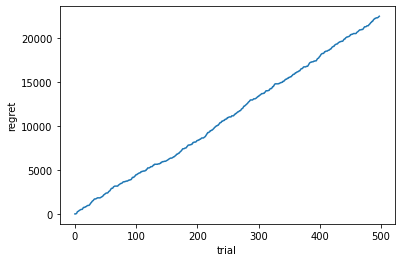

In [88]:
reinforcement_comparison(0.1, 0.9)